# Example 6.5: Windy Gridworld

Windy Gridworld example ([windy_grid_world.py](https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter06/windy_grid_world.py)) from [Reinforcement Learning: An Introduction](https://github.com/ShangtongZhang/reinforcement-learning-an-introduction) translated to Julia 1.0


Copyright (C)

2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)

2016 Kenta Shimada(hyperkentakun@gmail.com)

### Copyright

In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

* `PyPlot` as a substitute for `matplotlib.pyplot`
* `Distributions` as a substitute for `np.random.binomial`

In [62]:
import Plots
using Distributions
Plots.pyplot()

Plots.PyPlotBackend()

Declaration of global variables

In [9]:
# world height
WORLD_HEIGHT = 7

# world width
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 1
ACTION_DOWN = 2
ACTION_LEFT = 3
ACTION_RIGHT = 4

# probability for exploration
ε = 0.1

# Sarsa step size
α = 0.5

# reward for each step
REWARD = -1.0

START = [4, 1]
GOAL = [4, 8]
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT];

Function `step`that is used to calculate the reward and next state by a given action and current state

In [26]:
function step_(state, action)
    i, j = state
    if action == ACTION_UP
        return [max(i - 1 - WIND[j], 1), j]
    elseif action == ACTION_DOWN
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT), 1), j]
    elseif action == ACTION_LEFT
        return [max(i - WIND[j], 1), max(j - 1, 1)]
    elseif action == ACTION_RIGHT
        return [max(i - WIND[j], 1), min(j + 1, WORLD_WIDTH)]
    else
        println("assert falsoooo")
        @assert false
    end
end

step_ (generic function with 1 method)

In [29]:
# play for an episode
function episode(q_value)
    # track the total time steps in this episode
    time_ = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if rand(Binomial(1, ε)) == 1
        action = rand(ACTIONS)
    else
        values_ = q_value[state[1], state[2], :]
        action = rand([action_ for (action_, value_) in enumerate(values_) if value_ == maximum(values_)])
    end

    # keep going until get to the goal state
    while state != GOAL
        next_state = step_(state, action)
        if rand(Binomial(1, ε)) == 1
            next_action = rand(ACTIONS)
        else
            #println(next_state[1])
            #println(next_state[2])
            values_ = q_value[next_state[1], next_state[2], :]
            next_action = rand([action_ for (action_, value_) in enumerate(values_) if value_ == maximum(values_)])
        end
        # Sarsa update
        q_value[state[1], state[2], action] += 
            α * (REWARD + q_value[next_state[1], next_state[2], next_action] -
                         q_value[state[1], state[2], action])
        state = next_state
        action = next_action
        time_ += 1
    end
    return time_
end

episode (generic function with 1 method)

Main function that calculates a path using Sarsa's algorithm.

In [68]:
q_value = zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
episode_limit = 500

steps = []
ep = 0
#episode(q_value)
while ep < episode_limit
    append!(steps, episode(q_value))
    ep += 1
end

steps = accumulate(+, steps)
#xlabel('Time steps')
#ylabel('Episodes')
#plt.savefig('figure_6_3.png')
#plt.close()

Plot of episodes 

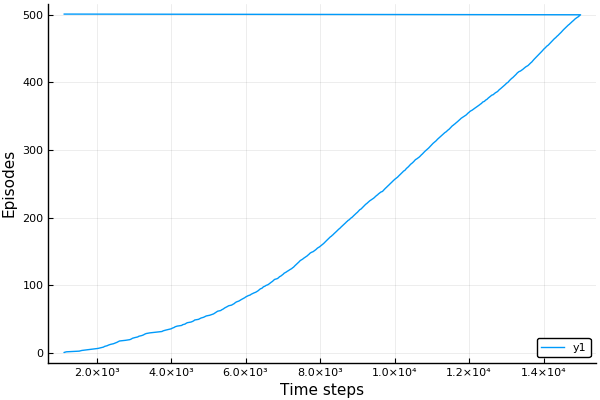

In [69]:
Plots.plot(steps, range(1, stop = length(steps) + 1), fmt = :png)
Plots.xaxis!("Time steps")
Plots.yaxis!("Episodes")

In [100]:
# display the optimal policy
optimal_policy = []
for i in range(1, stop=WORLD_HEIGHT)
    push!(optimal_policy, [])
    for j in range(1, stop=WORLD_WIDTH)
        if [i, j] == GOAL
            append!(optimal_policy[end],"G")
            continue
        end
        bestAction = argmax(q_value[i, j, :])
        if bestAction == ACTION_UP
            append!(optimal_policy[end], "U")
        elseif bestAction == ACTION_DOWN
            append!(optimal_policy[end], "D")
        elseif bestAction == ACTION_LEFT
            append!(optimal_policy[end], "L")
        elseif bestAction == ACTION_RIGHT
            append!(optimal_policy[end], "R")
        end
    end
end
println("Optimal policy is:")
for row in optimal_policy
    println(row)
end
#println("Wind strength for each column:\n{}".format([str(w) for w in WIND]))

Optimal policy is:
Any['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
Any['R', 'R', 'D', 'R', 'R', 'R', 'U', 'D', 'L', 'D']
Any['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
Any['U', 'R', 'D', 'R', 'R', 'R', 'U', 'G', 'R', 'D']
Any['L', 'R', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'L']
Any['R', 'R', 'R', 'R', 'R', 'U', 'U', 'D', 'L', 'L']
Any['L', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'D']
